<a href="https://colab.research.google.com/github/aycariko/Fit-Or-Fraud/blob/main/fit_or_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd # veri setini tablosal olarak çizeriz
import numpy as np # matematiksel işlemler için
import matplotlib.pyplot as plt # bunlar da görselleştirme için
import seaborn as sns

# uyarı mesajlarını gizleyelim
import warnings
warnings.filterwarnings("ignore")

# veriyi oku
df = pd.read_csv("/content/creditcard.csv")  # klasör yapına göre yol değişebilir


In [8]:
df.head()
# V ler kullanıcı kimliklerini tanımlayan anonim featurelar (tc, yaş kart bilgisini matematiksle olarak vermiş aynı zamanda da böyle bir generalization yapmış)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
# Kaç satır ve sütun var?
print("Veri kümesinin boyutu:", df.shape)

# Hangi sütunlar var, tipleri ne?
print("\nSütun bilgileri:")
print(df.info())

# Eksik veri var mı?
print("\nEksik değer sayısı:")
print(df.isnull().sum())


Veri kümesinin boyutu: (85259, 31)

Sütun bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85259 entries, 0 to 85258
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85259 non-null  int64  
 1   V1      85259 non-null  float64
 2   V2      85259 non-null  float64
 3   V3      85259 non-null  float64
 4   V4      85259 non-null  float64
 5   V5      85259 non-null  float64
 6   V6      85259 non-null  float64
 7   V7      85259 non-null  float64
 8   V8      85259 non-null  float64
 9   V9      85259 non-null  float64
 10  V10     85259 non-null  float64
 11  V11     85259 non-null  float64
 12  V12     85259 non-null  float64
 13  V13     85259 non-null  float64
 14  V14     85259 non-null  float64
 15  V15     85259 non-null  float64
 16  V16     85259 non-null  float64
 17  V17     85259 non-null  float64
 18  V18     85259 non-null  float64
 19  V19     85259 non-null  float64
 20  V20     85259 non-n

sınıf sayıları :/n Class
0.0    85054
1.0      204
Name: count, dtype: int64
sınıf oranları :/n Class
0.0    99.760726
1.0     0.239274
Name: proportion, dtype: float64


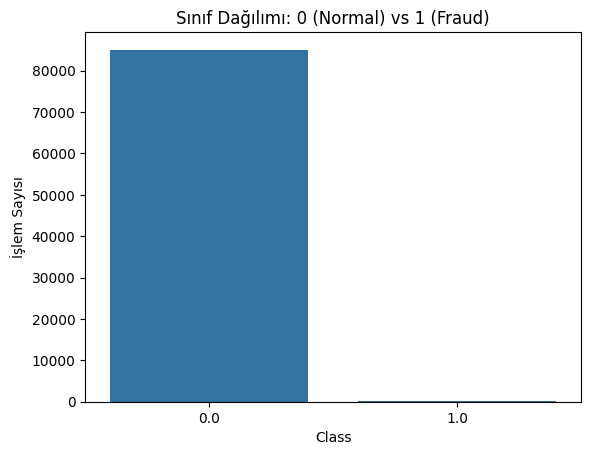

In [10]:
print ("sınıf sayıları :/n",df['Class'].value_counts())
print("sınıf oranları :/n",df['Class'].value_counts(normalize=True)*100) # hθ(x) = P(y = 1 | x)

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Class', data=df)
plt.title('Sınıf Dağılımı: 0 (Normal) vs 1 (Fraud)')
plt.xlabel('Class')
plt.ylabel('İşlem Sayısı')
plt.show()
# oran %99 olduğu için overfitting var yani freud tahmin etmez

In [15]:
#hepsini benzer ölçeğe çekmeğe çalışıyoruz
#ortalamayı 0 standart sapmayı 1 yapmak
from sklearn.preprocessing import StandardScaler

# Yeni bir dataframe oluşturalım ki orijinali bozulmasın
scaled_df = df.copy()
scaler = StandardScaler()

# Amount ve Time değişkenlerini standardize edelim
scaled_df [['Amount','Time']] = scaler.fit_transform(scaled_df[['Amount','Time']])

#Amount ve time üzerinden görelim
scaled_df[['Amount','Time']].describe()






,Amount,Time
count,8.525800e+04,8.525900e+04
mean,2.383533e-17,-1.386766e-16
std,1.000006e+00,1.000006e+00
min,-3.665477e-01,-2.469877e+00
25%,-3.379316e-01,-4.533729e-01
50%,-2.659813e-01,1.583754e-01
75%,-3.157485e-02,7.814205e-01
max,7.287488e+01,1.403189e+00


In [26]:
from sklearn.model_selection import train_test_split

# featurelar x target variable y
X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']

# Veriyi %80 eğitim - %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [17]:
y.isnull().sum()


np.int64(1)

In [27]:
scaled_df = scaled_df.dropna()


In [28]:
X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression

# L2 Regularization (default): Ridge (ceza ekler)
model = LogisticRegression(class_weight='balanced', solver='liblinear', C=1.0)

# Modeli eğit
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Test verisi ile tahmin yap
y_pred = model.predict(X_test)

# Confusion Matrix ve metrikler
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[16690   321]
 [    4    37]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     17011
         1.0       0.10      0.90      0.19        41

    accuracy                           0.98     17052
   macro avg       0.55      0.94      0.59     17052
weighted avg       1.00      0.98      0.99     17052



In [23]:

y_scores = model.predict_proba(X_test)[:, 1]  # sadece Class=1 (fraud) için olan sütunu al


from sklearn.metrics import precision_score, recall_score


threshold = 0.7
y_pred_thresh = (y_scores >= threshold).astype(int)

# 3. Precision ve Recall hesapla
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)

print(f"Threshold: {threshold}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Threshold: 0.7
Precision: 0.15
Recall: 0.90


In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_thresh)
print("Confusion Matrix (Threshold = 0.7):\n", cm)


Confusion Matrix (Threshold = 0.7):
 [[16808   203]
 [    4    37]]


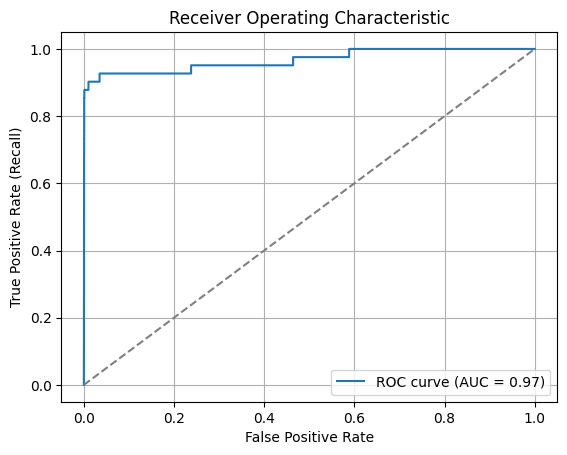

In [25]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()
